<a href="https://colab.research.google.com/github/kwon0136/MachineLearning/blob/master/190424/Question03Answer03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

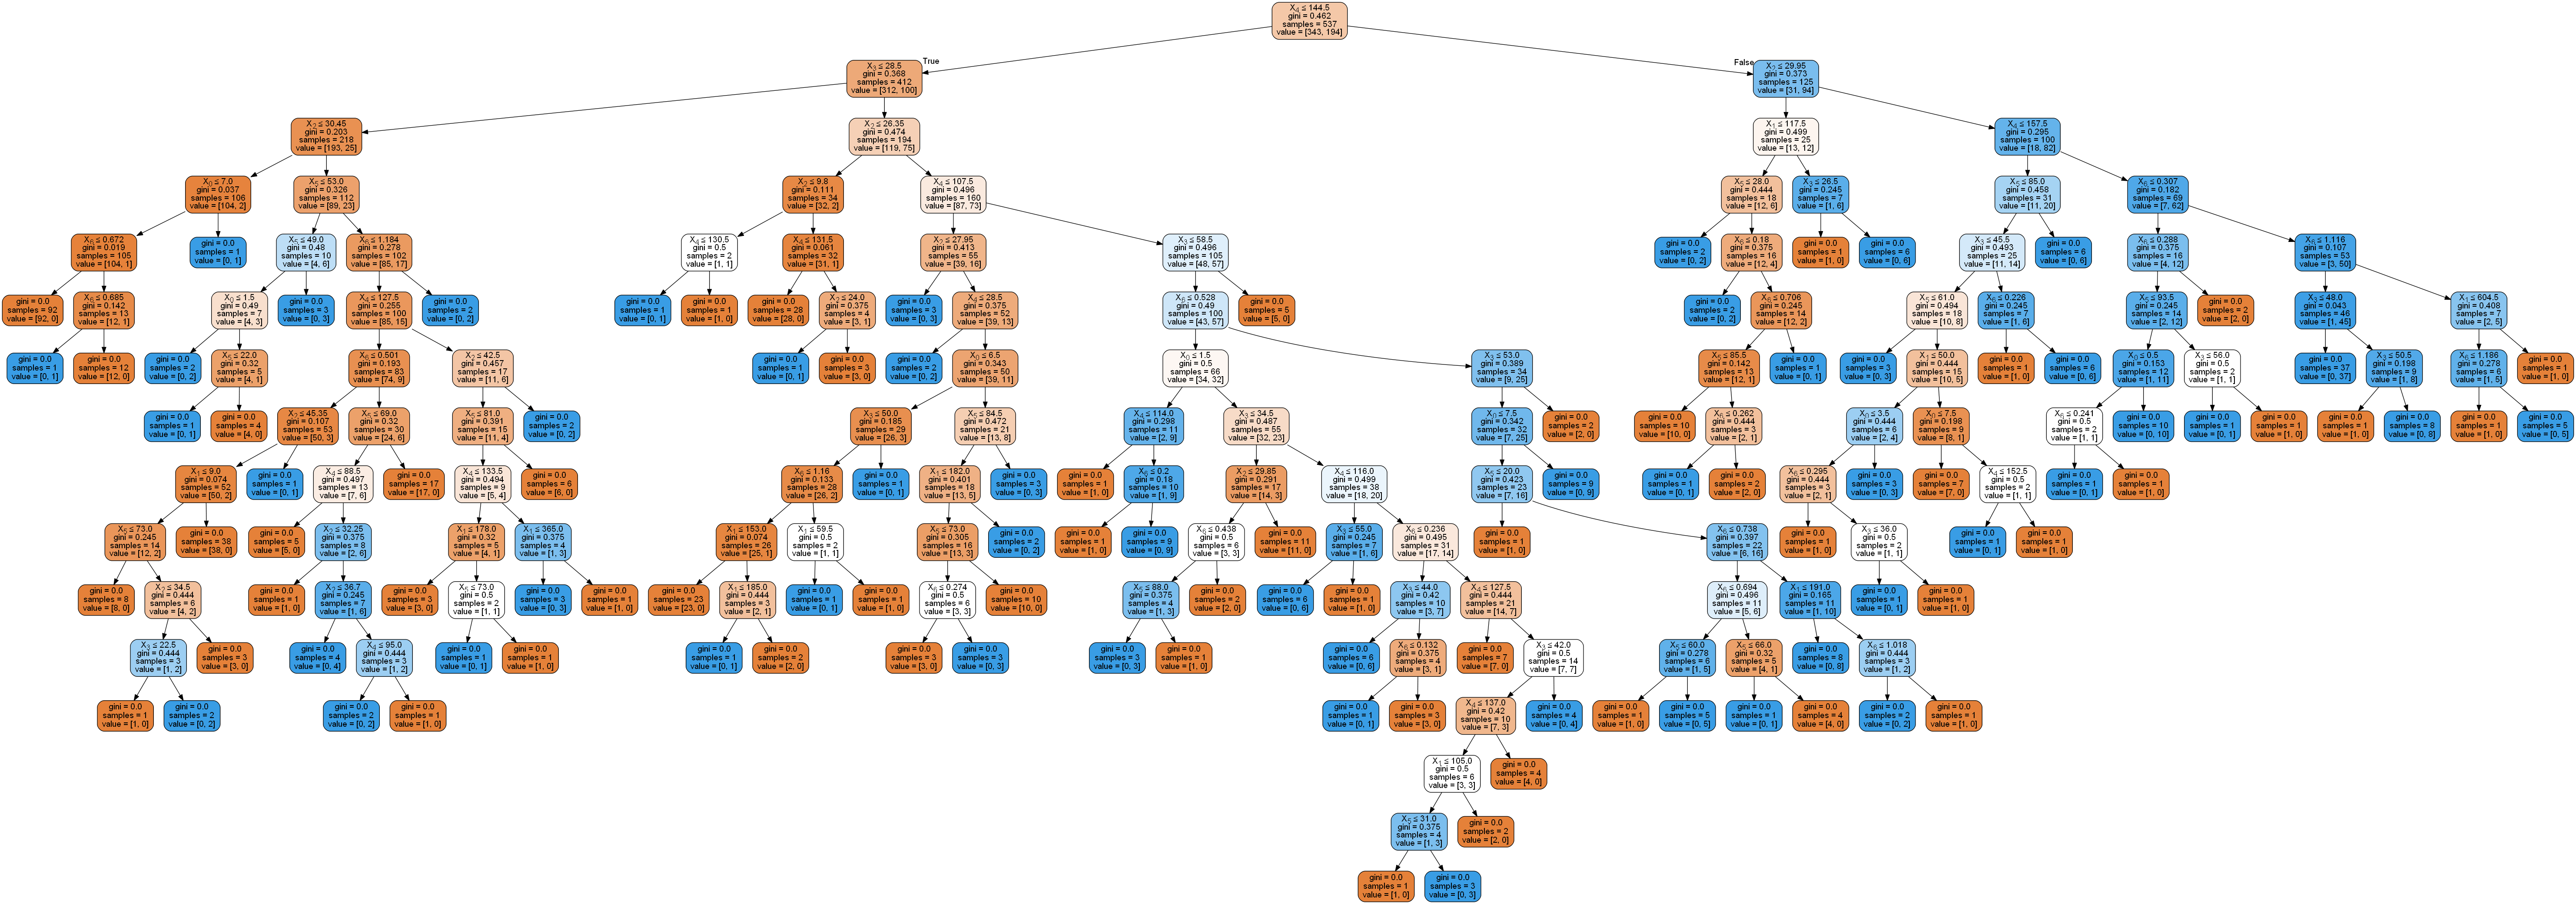

In [0]:
#1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
data = pd.read_csv("Diabetes.csv")
sel_names = ['Pregnancies', 'Insulin', 'BMI', 'Age', 
             'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
x = data[sel_names].values
y = data['Outcome'].values.reshape(-1,1)
xtrain, xtest, ytrain, ytest = \
    train_test_split(x, y, test_size=0.3, random_state=0)
dstClf = DecisionTreeClassifier()
dstClf.fit(xtrain, ytrain)
rResult = dstClf.predict(xtest)
rResult

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
import graphviz
import os
dot_data = StringIO()
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'

export_graphviz(dstClf, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

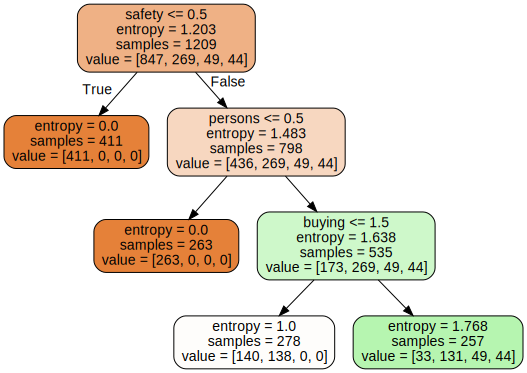

In [0]:
# 2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score

data = pd.read_csv('Car.csv',names=['buying','maint','doors','persons','lug_boot','safety','class'],
                  header=0)

data['class'],class_names = pd.factorize(data['class'])
data['buying'],_ = pd.factorize(data['buying'])
data['maint'],_ = pd.factorize(data['maint'])
data['doors'],_ = pd.factorize(data['doors'])
data['persons'],_ = pd.factorize(data['persons'])
data['lug_boot'],_ = pd.factorize(data['lug_boot'])
data['safety'],_ = pd.factorize(data['safety'])
x,y = data.iloc[:,:-1], data.iloc[:,-1]
x1, y1= x.values, y.values.reshape(-1,1)
xtrain, xtest, ytrain, ytest = \
    train_test_split(x1, y1, test_size=0.3, random_state=0)
dtree = tree.DecisionTreeClassifier(criterion="entropy", 
                                    max_depth=3, 
                                    random_state=0)
dtree.fit(xtrain, ytrain)
yResult = dtree.predict(xtest)
metrics.accuracy_score(ytest, yResult)
import os
import graphviz
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'
dot_data = tree.export_graphviz(dtree,
                               out_file=None, filled=True, rounded=True,
                               feature_names=list(data.columns.values[:-1]))
graph = graphviz.Source(dot_data)
graph

In [0]:
#3 
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#import sklearn.model_selection
from sklearn import metrics
import pandas as pd
import numpy as np
data = pd.read_csv("Diabetes.csv")
data2 = data[(data.BloodPressure !=0) & (data.BMI !=0) & (data.Glucose !=0)]
feature_name = ['Pregnancies', 'Glucose', 'BMI','DiabetesPedigreeFunction']
x = data2[feature_name]
y = data2.Outcome
logreg = LogisticRegression()
xtrain, xtest, ytrain, ytest = \
    train_test_split(x,y, test_size=0.3, random_state=0)
logreg.fit(xtrain, ytrain)
rResult = logreg.predict(xtest)
cmData = metrics.confusion_matrix(ytest, rResult)
cmData

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[123,  21],
       [ 28,  46]], dtype=int64)

In [0]:
#4
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import pandas as pd
import numpy as np
data = pd.read_csv("Diabetes.csv", header=0)
x = data.iloc[:,:-1]
y = data.iloc[:,-1:]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
classifiers = [('LR', lr), ('KNN', knn), ('DT', dt)]
for clf_name, clf in classifiers:
    clf.fit(xtrain, ytrain)
    rResult = clf.predict(xtest)
    accuracy = metrics.accuracy_score(ytest, rResult)
    # precision, recall ?
    print(accuracy)

0.7835497835497836
0.7489177489177489
0.7619047619047619


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
